<a href="https://colab.research.google.com/github/anuj7169/ML/blob/main/ML_Expt_4_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
import numpy as np


In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
print("Training Tensors")
print("=======================")
print("Number of dimensions in tensor: %d"%x_train.ndim)
print("Tensor shape: ", x_train.shape)
print("Data type: %s"%x_train.dtype)
print("=======================")
print()
print("Test Tensors")
print("=======================")
print("Number of dimensions in tensor: %d"%x_test.ndim)
print("Tensor shape: ", x_test.shape)
print("Data type: %s"%x_test.dtype)


Training Tensors
Number of dimensions in tensor: 3
Tensor shape:  (60000, 28, 28)
Data type: float64

Test Tensors
Number of dimensions in tensor: 3
Tensor shape:  (10000, 28, 28)
Data type: float64


In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test,  y_test, verbose=2)
model.summary()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 9s 150us/sample - loss: 0.2939 - accuracy: 0.9154
Epoch 2/5
60000/60000 [==============================] - 4s 59us/sample - loss: 0.1423 - accuracy: 0.9578
Epoch 3/5
60000/60000 [==============================] - 3s 58us/sample - loss: 0.1083 - accuracy: 0.9671
Epoch 4/5
60000/60000 [==============================] - 4s 59us/sample - loss: 0.0881 - accuracy: 0.9728
Epoch 5/5
60000/60000 [==============================] - 4s 59us/sample - loss: 0.0753 - accuracy: 0.9766
10000/10000 - 0s - loss: 0.0749 - accuracy: 0.9763
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)    

In [ ]:
x_test[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
predictions = model.predict(x_test)
print(predictions[1020])
np.argmax(predictions[1020])


[6.9992909e-12 7.0201316e-09 9.4702085e-07 9.9966705e-01 2.6319118e-09
 1.1595194e-05 2.3388667e-13 2.1448820e-07 3.1754689e-04 2.6627267e-06]


3

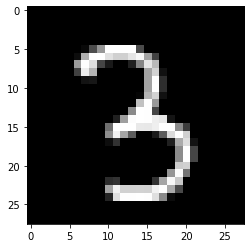

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_test[1020],cmap='gray')

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.98039216 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


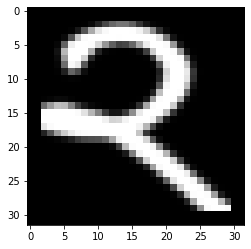

(28, 28)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mi
import cv2
img = mi.imread('D:\Machine Learning\Datasets\Handwritten Charaters\Devnagri HWCR\Devanagari_training_set_handwritten\digit_2\9726.png')
print(img)
plt.imshow(img,cmap='gray')
plt.show()
img.dtype
img=cv2.resize(img, (28,28), interpolation = cv2.INTER_AREA)
img.shape

In [ ]:
x_test[9999]=img

In [ ]:
predictions = model.predict(x_test)
print(predictions[9999])
print(type(predictions))
np.argmax(predictions[9999])

[5.0714879e-13 8.4028038e-08 9.9870276e-01 1.2942587e-03 6.6615996e-07
 1.5827710e-07 2.0485597e-06 1.4401002e-11 5.5537129e-08 9.3184867e-13]
<class 'numpy.ndarray'>


2

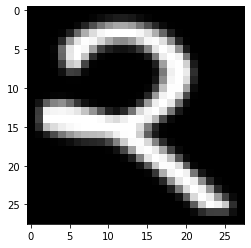

In [ ]:
plt.imshow(x_test[9999],cmap='gray')

In [ ]:
pred=[]
for j in range(len(predictions)):
   pred.append(np.argmax(predictions[j]))

In [ ]:
pred

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 5,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 2,
 9,
 8,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 9,
 8,
 7,
 2,
 3,
 0,
 6,
 4,
 2,


In [ ]:
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']


In [ ]:
import sklearn
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[ 971,    0,    1,    1,    0,    0,    4,    1,    2,    0],
       [   0, 1124,    3,    1,    0,    1,    2,    0,    4,    0],
       [   7,    2,  994,    2,    3,    0,    2,    5,   17,    0],
       [   0,    0,    4,  980,    0,    7,    0,    7,    9,    3],
       [   1,    1,    0,    0,  956,    2,    5,    1,    3,   13],
       [   3,    0,    0,    6,    1,  874,    2,    1,    4,    1],
       [   8,    3,    1,    0,    2,    4,  934,    0,    6,    0],
       [   1,    5,    6,    1,    0,    0,    0, 1004,    2,    9],
       [   3,    0,    1,    4,    3,    1,    1,    4,  954,    3],
       [   6,    5,    0,    2,   13,    1,    0,    5,    6,  971]],
      dtype=int64)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred, target_names=class_names))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.96      0.97      1032
           3       0.98      0.97      0.98      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.97      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.95      0.98      0.96       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
print('Accuracy:', sklearn.metrics.accuracy_score(y_test,pred))

print('F1 score:',sklearn.metrics.f1_score(y_test,pred,
                            average='weighted'))

print( 'Recall:',sklearn.metrics.recall_score(y_test,pred,
                              average='weighted'))

print('Precision:',sklearn.metrics.precision_score(y_test,pred,
                                    average='weighted'))

Accuracy: 0.9762
F1 score: 0.9762084515864299
Recall: 0.9762
Precision: 0.9763295166249001
